## Task6 泰坦尼克案例分析

泰坦尼克号(RMS Titanic)作为英国白星航运公司下的一艘奥林匹克级邮轮，是20世纪最著名的邮轮之一，这不仅因为其在建成后是当时世界上最大的豪华客运轮船，还因为这艘被誉为‘永不沉没’的轮船竟然在其处女航中就遭遇了厄运。在1912年4月15号，载有2224人的泰坦尼克号因与冰山相撞而沉没，这次事故造成了1502人死亡，同时也震惊了世界。在这次事故中，造成如此多的伤亡主要原因之一是由于船上没有配备足够的救生船，但是对于幸存者而言还有一些其他的因素导致了他们更有可能比别人活下来。在这里对其他可能的影响因素进行分析，寻找出那些人在泰坦尼克号上更有可能成为幸存者。

### 导入相关库

In [3]:
# 导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 中文字体设置
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

### 1. 导入数据库

In [4]:
train = pd.read_csv('./data/train.csv', engine='python', encoding='utf-8')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. 查看各列的数据类型

In [7]:
# train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3. 统计各列的缺失值

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 4. 对年龄缺失值用其中位数进行填充

In [9]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### 5. 查看各个特征对应的人数分布，即画出存活人数情况、各等级舱人数、男女人数和登船港口人数的条形图，画在一个2*2的图像里

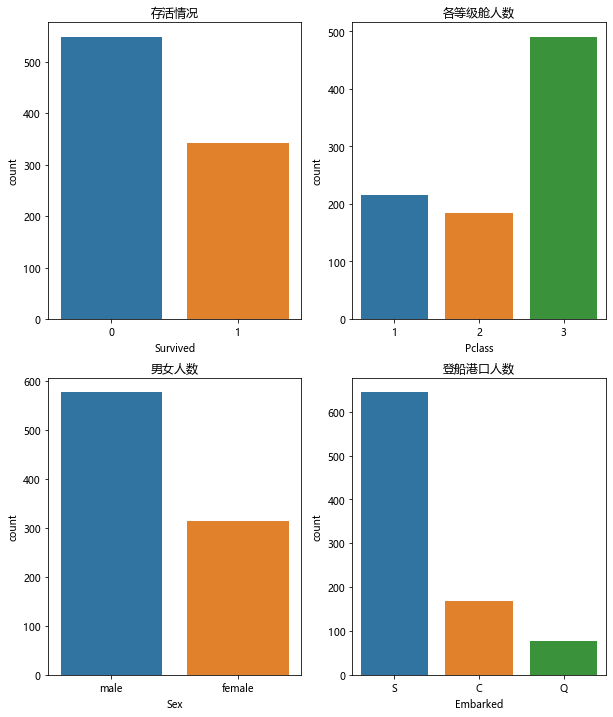

In [14]:
# 各属性对应的人数分布
plt.figure(figsize=(10,12))
plt.subplot(2,2,1)
sns.countplot(x='Survived', data=train)
plt.title('存活情况')

plt.subplot(2,2,2)
sns.countplot(x='Pclass', data=train)
plt.title('各等级舱人数')

plt.subplot(2,2,3)
sns.countplot(x='Sex', data=train)
plt.title('男女人数')

plt.subplot(2,2,4)
sns.countplot(x='Embarked', data=train)
plt.title('登船港口人数')
plt.show()

### 6. 画一个饼图显示男女人数比例

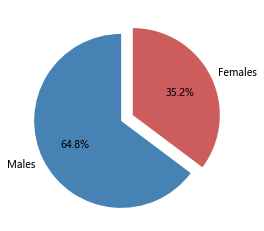

In [17]:
males = (train['Sex'] == 'male').sum()
females = (train['Sex'] == 'female').sum()
proportions = [males, females]

# 绘制饼图
plt.pie(proportions, labels=['Males', 'Females'], shadow=False, colors=['steelblue', 'indianred'], explode=(0.15,0), startangle=90, autopct='%1.1f%%')
plt.show()

### 7. 用柱状图展示各等级船舱的存活死亡人数

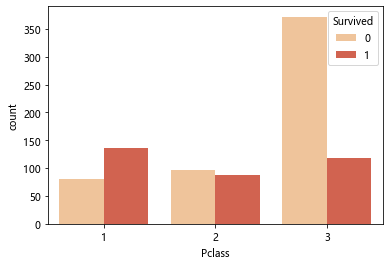

In [22]:
sns.countplot(x='Pclass', hue='Survived', data=train, palette='OrRd')
plt.show()

### 8. 各等级船舱按性别展示存活情况，用seaborn画条形图

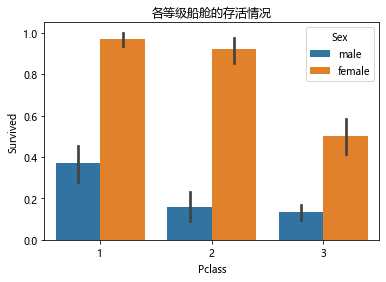

In [23]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)
plt.title('各等级船舱的存活情况')
plt.show()

### 9. 上船港口与存活人数的统计，画出堆叠条形图

   未获救   获救
S  427  217
C   75   93
Q   47   30


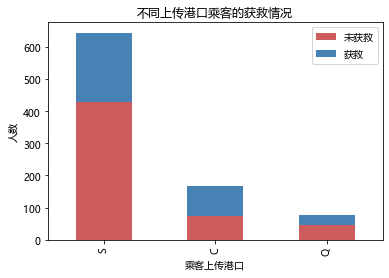

In [32]:
# 上船港口与存活情况之间的关系
Survived_0 = train.Embarked[train.Survived == 0].value_counts()
Survived_1 = train.Embarked[train.Survived == 1].value_counts()
Pclass_df = pd.DataFrame({'未获救': Survived_0, '获救': Survived_1})
print(Pclass_df)
Pclass_df.plot(kind='bar', stacked=True, colors=['indianred', 'steelblue'])
plt.title('不同上传港口乘客的获救情况')
plt.xlabel('乘客上传港口')
plt.ylabel('人数')
plt.show()

### 10. 不同性别的存活人数，画出点图

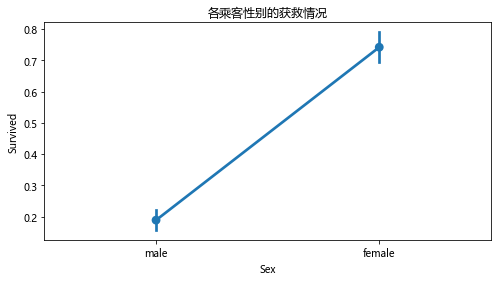

In [34]:
plt.figure(figsize=(8, 4))
sns.pointplot(x='Sex', y='Survived', data=train)
plt.title('各乘客性别的获救情况')
plt.show()

### 11. 用分类散点图来表示费用和船舱等级对存活情况的影响

D:\Anaconda3\envs\pytorch3.6\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\pytorch3.6\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\pytorch3.6\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


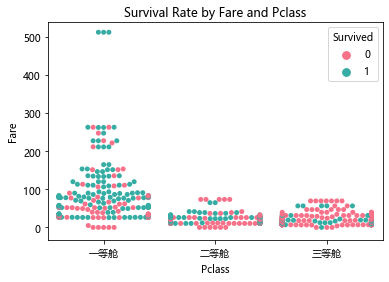

In [38]:
sns.swarmplot(x='Pclass', y='Fare', hue='Survived', data=train, palette='husl')
plt.xticks([0,1,2], ['一等舱', '二等舱', '三等舱'])
plt.title('Survival Rate by Fare and Pclass')
plt.show()

### 12. 绘制年龄存活状况的核密度图

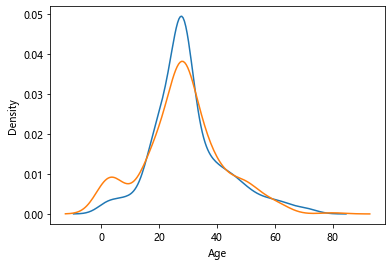

In [39]:
sns.kdeplot(train[train['Survived'] == 0]['Age'], label='死亡')
sns.kdeplot(train[train['Survived'] == 1]['Age'], label='存活')
plt.show()

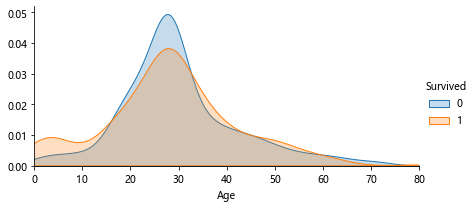

In [41]:
# 方法二
# 不同年龄存活率分布
# sns.FacetGrid可以绘制多个轴变量相同的图，aspect设置aspect ratio纵横比，size设置图片高度，通常需要用.map()作图。
a = sns.FacetGrid(train, hue='Survived', aspect=2)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=[0, train['Age'].max()])
a.add_legend()
plt.show()

### 13. 将年龄离散化，增加一列Age_level

In [44]:
bins = [0, 10, 20, 30, 40, 80]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
train['Age_level'] = pd.cut(train['Age'], bins=bins, labels=labels)

### 14. 不同年龄层的获救情况，绘制点图

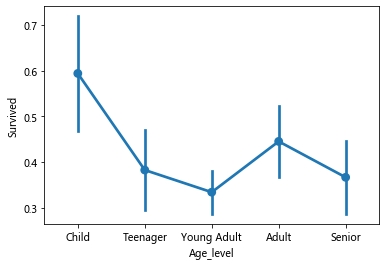

In [46]:
sns.pointplot(x='Age_level', y='Survived', data=train)
plt.show()

### 15. 不同年龄层的乘客按性别展示获救情况，绘制点图

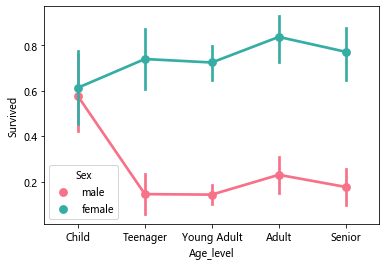

In [49]:
sns.pointplot(x='Age_level', y='Survived', hue='Sex', data=train, palette='husl')
plt.show()

### 小作业

#### 第一题: 按年龄分组展示存活率

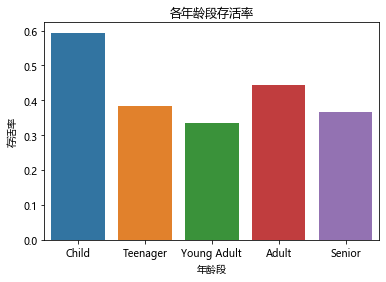

In [54]:
sns.barplot(x='Age_level', y='Survived', data=train, ci=0)
plt.xlabel('年龄段')
plt.ylabel('存活率')
plt.title('各年龄段存活率')
plt.show()

#### 第二题: 不同等级船舱里年龄的分布，画出箱线图

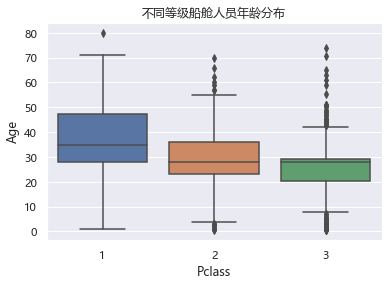

In [64]:
sns.boxplot(x='Pclass', y='Age', data=train)
plt.title('不同等级船舱人员年龄分布')
plt.show()

#### 第三题: 画出费用的分布直方图

D:\Anaconda3\envs\pytorch3.6\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


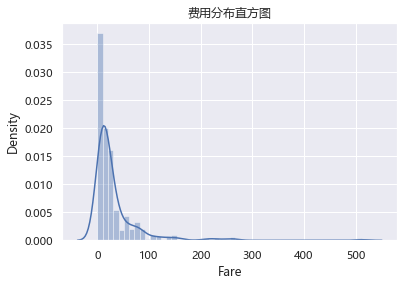

In [63]:
sns.set()
# 中文字体设置
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False
sns.distplot(a=train['Fare'])
plt.title('费用分布直方图')
plt.show()